<a href="https://colab.research.google.com/github/kjaron83/tensorflow-tutorials/blob/master/classification/music_genre/music_genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processing the [music genre](https://www.kaggle.com/harish24/music-genre-classification) dataset.

In [1]:
# Import required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read in the music genres dataset
musics = pd.read_csv("https://raw.githubusercontent.com/kjaron83/tensorflow-tutorials/master/classification/music_genre/music_genre.csv")
musics

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351028,-6.376458,18.618876,-13.697912,15.344631,-12.285267,10.980492,-8.324325,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874683,2.916037,21.523726,-8.554704,23.358671,-10.103617,11.903744,-5.560388,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,31.689013,-13.987036,25.754763,-13.649585,11.629271,-11.780589,9.706443,-13.123111,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,1.754462,14.238345,-4.830883,9.297966,-0.757742,8.149012,-3.196314,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,-32.489269,10.864513,-23.357929,0.503118,-11.805832,1.206805,-13.083821,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,0.351991,0.079469,2008.581132,2106.617024,4254.215942,0.089267,-153.632309,109.857262,-23.085709,59.040672,-7.490499,19.731213,-16.481268,18.078421,-22.209015,15.402501,-12.380283,12.350816,-12.306271,5.780973,-10.279924,1.791489,-13.304210,2.473193,-6.717574,-1.189238,rock
996,rock.00096.wav,0.398653,0.076452,2006.051164,2068.327905,4147.374921,0.097659,-142.424210,116.219780,-32.177074,49.122971,-8.375370,22.869043,-18.311548,20.091076,-22.100393,10.800343,-12.982494,14.065345,-16.394691,4.152589,-4.350760,3.736455,-10.845638,1.875218,-7.459579,-2.802677,rock
997,rock.00097.wav,0.432103,0.081617,2077.190361,1926.989678,4030.767293,0.121824,-125.031311,115.194977,-47.993507,52.834530,-13.480978,21.755636,-12.418755,20.130632,-18.361841,10.113327,-16.048916,10.481961,-17.951916,1.211113,-11.534864,1.844774,-12.847901,3.447425,-12.594178,-2.107002,rock
998,rock.00098.wav,0.362349,0.083888,1398.672358,1818.148469,3014.740104,0.048731,-224.972305,123.656891,-9.754534,56.595062,10.443339,20.611948,-10.250206,15.563110,-8.238567,12.796227,-9.000731,7.683081,-10.071786,-0.255098,-5.276486,-2.816289,-4.416438,1.558265,-5.043121,-3.585596,rock


In [4]:
# Drop the filename column
musics = musics.drop("filename", axis=1)
musics

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351028,-6.376458,18.618876,-13.697912,15.344631,-12.285267,10.980492,-8.324325,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874683,2.916037,21.523726,-8.554704,23.358671,-10.103617,11.903744,-5.560388,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
2,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,31.689013,-13.987036,25.754763,-13.649585,11.629271,-11.780589,9.706443,-13.123111,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,1.754462,14.238345,-4.830883,9.297966,-0.757742,8.149012,-3.196314,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,-32.489269,10.864513,-23.357929,0.503118,-11.805832,1.206805,-13.083821,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.351991,0.079469,2008.581132,2106.617024,4254.215942,0.089267,-153.632309,109.857262,-23.085709,59.040672,-7.490499,19.731213,-16.481268,18.078421,-22.209015,15.402501,-12.380283,12.350816,-12.306271,5.780973,-10.279924,1.791489,-13.304210,2.473193,-6.717574,-1.189238,rock
996,0.398653,0.076452,2006.051164,2068.327905,4147.374921,0.097659,-142.424210,116.219780,-32.177074,49.122971,-8.375370,22.869043,-18.311548,20.091076,-22.100393,10.800343,-12.982494,14.065345,-16.394691,4.152589,-4.350760,3.736455,-10.845638,1.875218,-7.459579,-2.802677,rock
997,0.432103,0.081617,2077.190361,1926.989678,4030.767293,0.121824,-125.031311,115.194977,-47.993507,52.834530,-13.480978,21.755636,-12.418755,20.130632,-18.361841,10.113327,-16.048916,10.481961,-17.951916,1.211113,-11.534864,1.844774,-12.847901,3.447425,-12.594178,-2.107002,rock
998,0.362349,0.083888,1398.672358,1818.148469,3014.740104,0.048731,-224.972305,123.656891,-9.754534,56.595062,10.443339,20.611948,-10.250206,15.563110,-8.238567,12.796227,-9.000731,7.683081,-10.071786,-0.255098,-5.276486,-2.816289,-4.416438,1.558265,-5.043121,-3.585596,rock


In [5]:
# Create X & y
X = musics.drop("label", axis=1)
y = musics["label"]

In [6]:
# Get the number of the unique labels
len(y.unique())

10

In [7]:
# Normalize the labels
y_normal = pd.get_dummies(y)
y_normal

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,1
996,0,0,0,0,0,0,0,0,0,1
997,0,0,0,0,0,0,0,0,0,1
998,0,0,0,0,0,0,0,0,0,1


In [11]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["chroma_stft", "rmse", "spectral_centroid", "spectral_bandwidth",
                      "rolloff", "zero_crossing_rate", "mfcc1", "mfcc2", "mfcc3", "mfcc4",
                      "mfcc5", "mfcc6", "mfcc7", "mfcc8", "mfcc9", "mfcc10", "mfcc11",
                      "mfcc12", "mfcc13", "mfcc14", "mfcc15", "mfcc16", "mfcc17", "mfcc18",
                      "mfcc19", "mfcc20"]), # get all values between 0 and 1
)

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y_normal, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_train_normal
X_test_normal = ct.transform(X_test)

X_train_normal[:10]

array([[0.22097657, 0.3041217 , 0.27930149, 0.4948161 , 0.37999678,
        0.12335936, 0.53583599, 0.5277403 , 0.73380258, 0.34624179,
        0.58180849, 0.69130229, 0.29151112, 0.51064548, 0.18459733,
        0.42035565, 0.1066698 , 0.19380569, 0.53309818, 0.44096664,
        0.39343733, 0.25880302, 0.2034079 , 0.1842886 , 0.25538416,
        0.1671172 ],
       [0.18869126, 0.21961421, 0.07094207, 0.07902109, 0.10844046,
        0.06332499, 0.48848529, 0.94578214, 0.49807147, 0.64618713,
        0.53521245, 0.37650477, 0.71117456, 0.16463291, 0.42035427,
        0.22595271, 0.49896743, 0.2628402 , 0.59803626, 0.16135824,
        0.56875185, 0.58931551, 0.53080191, 0.23954206, 0.50127377,
        0.46551047],
       [0.72662713, 0.4590603 , 0.48526119, 0.54861209, 0.56038188,
        0.39243009, 0.86979499, 0.49150834, 0.44793317, 0.5708383 ,
        0.31918312, 0.74864549, 0.49450952, 0.70344458, 0.34851775,
        0.65890656, 0.41465015, 0.79375183, 0.43073368, 0.77903346,
      

In [42]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.Input(shape=(26,)),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(X_train_normal, y_train, epochs=20, validation_data=(X_test_normal, y_test))

Epoch 1/20
25/25 [==============================] - 1s 9ms/step - loss: 2.3225 - accuracy: 0.0900 - val_loss: 2.3031 - val_accuracy: 0.1100
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 2.2930 - accuracy: 0.1388 - val_loss: 2.2925 - val_accuracy: 0.1300
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 2.2789 - accuracy: 0.1412 - val_loss: 2.2819 - val_accuracy: 0.1650
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 2.2706 - accuracy: 0.1612 - val_loss: 2.2741 - val_accuracy: 0.1600
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 2.2636 - accuracy: 0.1587 - val_loss: 2.2662 - val_accuracy: 0.1650
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 2.2558 - accuracy: 0.1587 - val_loss: 2.2594 - val_accuracy: 0.1700
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 2.2476 - accuracy: 0.1637 - val_loss: 2.2511 - val_accuracy: 0.1700
Epoch 8/20
25/25 [==

Text(0.5, 1.0, 'Model_1 training curves')

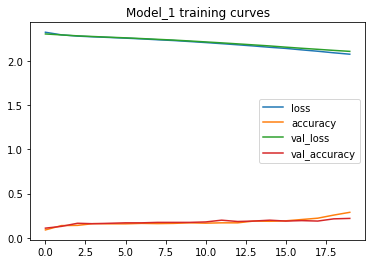

In [43]:
# Plot the loss curves
pd.DataFrame(history_1.history).plot()
plt.title("Model_1 training curves")

In [44]:
# Finding the best learning rate

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
  tf.keras.Input(shape=(26,)),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model (passing the lr_scheduler callback)
history_2 = model_2.fit(X_train, 
                      y_train, 
                      epochs=100,
                      validation_data=(X_test_normal, y_test),
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 1065.3992 - accuracy: 0.1000 - val_loss: 2.3554 - val_accuracy: 0.1400 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 1027.8317 - accuracy: 0.1000 - val_loss: 2.3513 - val_accuracy: 0.1650 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 985.8132 - accuracy: 0.1000 - val_loss: 2.3469 - val_accuracy: 0.1500 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 940.4329 - accuracy: 0.1000 - val_loss: 2.3422 - val_accuracy: 0.1600 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 890.3961 - accuracy: 0.1000 - val_loss: 2.3371 - val_accuracy: 0.1500 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 835.4665 - accuracy: 0.1000 - val_loss: 2.3316 - val_accuracy: 0.1200 - lr: 1.7783e-04
Epoch 7/100
25/25 [==================

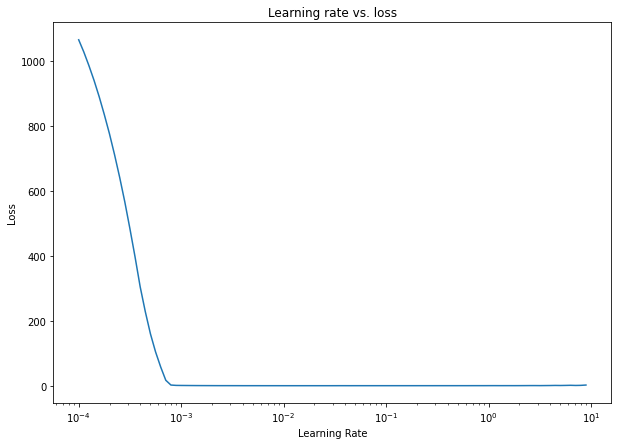

In [54]:
# Plot the learning rate versus the loss
import numpy as np

lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_2.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [55]:
# The best learning rate looks like 5e-03
best_learning_rate = 5e-03
best_learning_rate

0.005

In [58]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.Input(shape=(26,)),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(best_learning_rate),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(X_train_normal, y_train, epochs=20, validation_data=(X_test_normal, y_test))

Epoch 1/20
25/25 [==============================] - 1s 11ms/step - loss: 2.2956 - accuracy: 0.1250 - val_loss: 2.2701 - val_accuracy: 0.1450
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 2.2498 - accuracy: 0.1700 - val_loss: 2.2425 - val_accuracy: 0.1750
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 2.2032 - accuracy: 0.1800 - val_loss: 2.1878 - val_accuracy: 0.1850
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 2.1417 - accuracy: 0.1900 - val_loss: 2.1324 - val_accuracy: 0.2150
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 2.0841 - accuracy: 0.2800 - val_loss: 2.0858 - val_accuracy: 0.2550
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 1.9963 - accuracy: 0.3338 - val_loss: 2.0163 - val_accuracy: 0.2750
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 1.9056 - accuracy: 0.3500 - val_loss: 1.9577 - val_accuracy: 0.2850
Epoch 8/20
25/25 [=

Text(0.5, 1.0, 'Model_3 training curves')

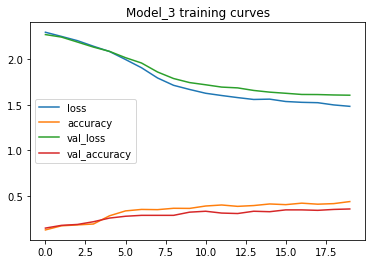

In [59]:
# Plot the loss curves
pd.DataFrame(history_3.history).plot()
plt.title("Model_3 training curves")

In [60]:
# Try to train longer (100 epochs)

# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.Input(shape=(26,)),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(best_learning_rate),
              metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(X_train_normal, y_train, epochs=100, validation_data=(X_test_normal, y_test))

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 2.2956 - accuracy: 0.1250 - val_loss: 2.2701 - val_accuracy: 0.1450
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 2.2498 - accuracy: 0.1700 - val_loss: 2.2425 - val_accuracy: 0.1750
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 2.2032 - accuracy: 0.1800 - val_loss: 2.1878 - val_accuracy: 0.1850
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 2.1417 - accuracy: 0.1900 - val_loss: 2.1324 - val_accuracy: 0.2150
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 2.0841 - accuracy: 0.2800 - val_loss: 2.0858 - val_accuracy: 0.2550
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 1.9963 - accuracy: 0.3338 - val_loss: 2.0163 - val_accuracy: 0.2750
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 1.9056 - accuracy: 0.3500 - val_loss: 1.9577 - val_accuracy: 0.2850
Epoch 8/100


Text(0.5, 1.0, 'Model_4 training curves')

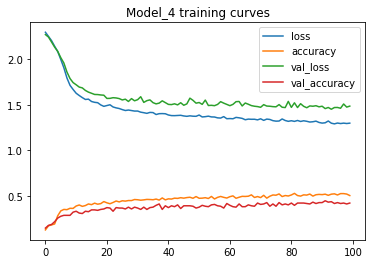

In [61]:
# Plot the loss curves
pd.DataFrame(history_4.history).plot()
plt.title("Model_4 training curves")

In [80]:
# Try to add more neurons

# Set random seed
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
  tf.keras.Input(shape=(26,)),
  tf.keras.layers.Dense(80, activation="relu"),
  tf.keras.layers.Dense(40, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(best_learning_rate),
              metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(X_train_normal, y_train, epochs=100, validation_data=(X_test_normal, y_test))

Epoch 1/100
25/25 [==============================] - 1s 11ms/step - loss: 2.2569 - accuracy: 0.1700 - val_loss: 2.1972 - val_accuracy: 0.1900
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 1.9364 - accuracy: 0.3187 - val_loss: 1.8972 - val_accuracy: 0.2900
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 1.7020 - accuracy: 0.3738 - val_loss: 1.8139 - val_accuracy: 0.2900
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 1.5801 - accuracy: 0.3950 - val_loss: 1.7877 - val_accuracy: 0.3300
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 1.5209 - accuracy: 0.4263 - val_loss: 1.6638 - val_accuracy: 0.3550
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 1.4769 - accuracy: 0.4475 - val_loss: 1.6233 - val_accuracy: 0.4100
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 1.4163 - accuracy: 0.4762 - val_loss: 1.5511 - val_accuracy: 0.4250
Epoch 8/100


Text(0.5, 1.0, 'Model_5 training curves')

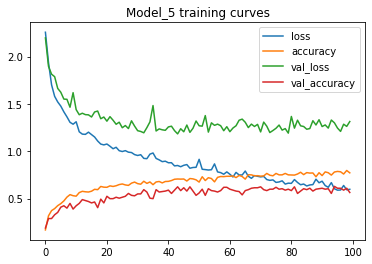

In [81]:
# Plot the loss curves
pd.DataFrame(history_5.history).plot()
plt.title("Model_5 training curves")

In [82]:
# Try to add even more neurons

# Set random seed
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.Sequential([
  tf.keras.Input(shape=(26,)),
  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_6.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(best_learning_rate),
              metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(X_train_normal, y_train, epochs=100, validation_data=(X_test_normal, y_test))

Epoch 1/100
25/25 [==============================] - 1s 29ms/step - loss: 2.0767 - accuracy: 0.2375 - val_loss: 1.8503 - val_accuracy: 0.2900
Epoch 2/100
25/25 [==============================] - 1s 22ms/step - loss: 1.5972 - accuracy: 0.4075 - val_loss: 1.6271 - val_accuracy: 0.3800
Epoch 3/100
25/25 [==============================] - 1s 23ms/step - loss: 1.4566 - accuracy: 0.4600 - val_loss: 1.5107 - val_accuracy: 0.4500
Epoch 4/100
25/25 [==============================] - 1s 22ms/step - loss: 1.3994 - accuracy: 0.4875 - val_loss: 1.5766 - val_accuracy: 0.4500
Epoch 5/100
25/25 [==============================] - 1s 25ms/step - loss: 1.3195 - accuracy: 0.5038 - val_loss: 1.5265 - val_accuracy: 0.4100
Epoch 6/100
25/25 [==============================] - 1s 24ms/step - loss: 1.2701 - accuracy: 0.5312 - val_loss: 1.4919 - val_accuracy: 0.4400
Epoch 7/100
25/25 [==============================] - 1s 24ms/step - loss: 1.2609 - accuracy: 0.5400 - val_loss: 1.5932 - val_accuracy: 0.4350
Epoch 

Text(0.5, 1.0, 'Model_6 training curves')

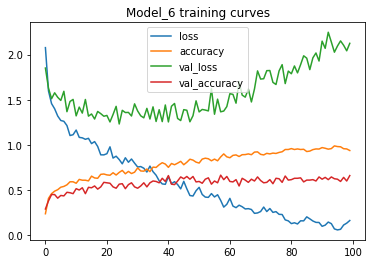

In [86]:
# Plot the loss curves
pd.DataFrame(history_6.history).plot()
plt.title("Model_6 training curves")

In [87]:
# Try to add 2 Dropout layers

# Set random seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
  tf.keras.Input(shape=(26,)),
  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_7.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(best_learning_rate),
              metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(X_train_normal, y_train, epochs=100, validation_data=(X_test_normal, y_test))

Epoch 1/100
25/25 [==============================] - 1s 32ms/step - loss: 2.1056 - accuracy: 0.2400 - val_loss: 1.8614 - val_accuracy: 0.2700
Epoch 2/100
25/25 [==============================] - 1s 25ms/step - loss: 1.6518 - accuracy: 0.3850 - val_loss: 1.7313 - val_accuracy: 0.3300
Epoch 3/100
25/25 [==============================] - 1s 26ms/step - loss: 1.5339 - accuracy: 0.4175 - val_loss: 1.5859 - val_accuracy: 0.3750
Epoch 4/100
25/25 [==============================] - 1s 25ms/step - loss: 1.4817 - accuracy: 0.4363 - val_loss: 1.6361 - val_accuracy: 0.3600
Epoch 5/100
25/25 [==============================] - 1s 26ms/step - loss: 1.4181 - accuracy: 0.4688 - val_loss: 1.5550 - val_accuracy: 0.4100
Epoch 6/100
25/25 [==============================] - 1s 26ms/step - loss: 1.4175 - accuracy: 0.4638 - val_loss: 1.6232 - val_accuracy: 0.4150
Epoch 7/100
25/25 [==============================] - 1s 24ms/step - loss: 1.2965 - accuracy: 0.5213 - val_loss: 1.5541 - val_accuracy: 0.4350
Epoch 

Text(0.5, 1.0, 'Model_7 training curves')

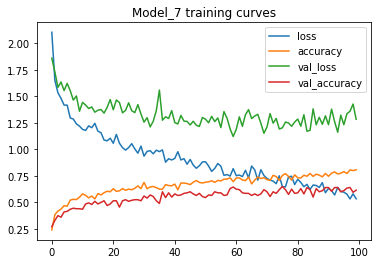

In [88]:
# Plot the loss curves
pd.DataFrame(history_7.history).plot()
plt.title("Model_7 training curves")

In [95]:
# Try to duplicate the layers

# Set random seed
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
  tf.keras.Input(shape=(26,)),
  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_8.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(best_learning_rate),
              metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(X_train_normal, y_train, epochs=100, validation_data=(X_test_normal, y_test))

Epoch 1/100
25/25 [==============================] - 2s 65ms/step - loss: 2.3769 - accuracy: 0.1150 - val_loss: 2.1685 - val_accuracy: 0.1450
Epoch 2/100
25/25 [==============================] - 1s 56ms/step - loss: 1.9267 - accuracy: 0.2675 - val_loss: 1.8842 - val_accuracy: 0.2500
Epoch 3/100
25/25 [==============================] - 1s 56ms/step - loss: 1.7463 - accuracy: 0.3212 - val_loss: 1.7574 - val_accuracy: 0.3250
Epoch 4/100
25/25 [==============================] - 2s 60ms/step - loss: 1.6891 - accuracy: 0.3413 - val_loss: 1.7160 - val_accuracy: 0.3150
Epoch 5/100
25/25 [==============================] - 1s 58ms/step - loss: 1.5954 - accuracy: 0.4137 - val_loss: 1.6295 - val_accuracy: 0.3450
Epoch 6/100
25/25 [==============================] - 1s 59ms/step - loss: 1.5724 - accuracy: 0.4162 - val_loss: 1.6735 - val_accuracy: 0.3350
Epoch 7/100
25/25 [==============================] - 1s 59ms/step - loss: 1.5367 - accuracy: 0.4475 - val_loss: 1.6127 - val_accuracy: 0.3450
Epoch 

Text(0.5, 1.0, 'Model_8 training curves')

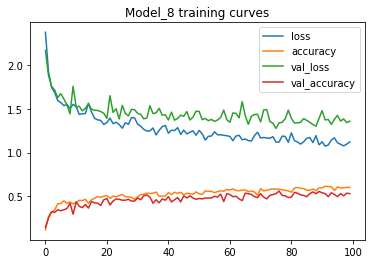

In [96]:
# Plot the loss curves
pd.DataFrame(history_8.history).plot()
plt.title("Model_8 training curves")

In [127]:
def visualize_model_value_accuracy(histories):
  """
  Returns a DataFrame that summarize the value accuracy data of the passed history items.
  """

  n = 0
  labels = []
  max_val_accuracy = []
  max_val_accuracy_index = []
  last_val_accuracy = []

  for history in histories:
    n += 1
    labels.append(f"model_{n}")
    max_val_accuracy.append(max(history.history["val_accuracy"]))
    max_val_accuracy_index.append(tf.argmax(history.history["val_accuracy"]).numpy())
    last_val_accuracy.append(history.history["val_accuracy"][-1])
  
  return pd.DataFrame({
      "Models": labels,
      "Max value accuracy": max_val_accuracy,
      "Index of max value accuracy": max_val_accuracy_index,
      "Last value accuracy": last_val_accuracy
      })

In [128]:
# Visualize all model value accuracy so far
visualize_model_value_accuracy((history_1, history_2, history_3, history_4, history_5, history_6, history_7, history_8))

,Models,Max value accuracy,Index of max value accuracy,Last value accuracy
0,model_1,0.220,19,0.220
1,model_2,0.165,1,0.100
2,model_3,0.355,19,0.355
3,model_4,0.445,91,0.420
4,model_5,0.630,94,0.565
5,model_6,0.665,57,0.660
6,model_7,0.650,75,0.615
7,model_8,0.560,76,0.530


Model_6 is the best so far, but it reach the maximum accuracy (66.5%) at the 57 epoch. Looks like, adding Dropout layers did not help.

In [162]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = np.round(model_6.predict(X_test_normal))

# Create confusion matrix
confusion_matrix(y_test.values.argmax(axis=1), y_preds.argmax(axis=1))

array([[14,  0,  1,  0,  0,  2,  1,  0,  0,  2],
       [ 0, 13,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0, 19,  0,  0,  1,  0,  1,  0,  1],
       [ 3,  1,  1, 11,  3,  0,  1,  0,  1,  0],
       [ 1,  0,  1,  0,  9,  0,  1,  2,  1,  0],
       [ 2,  0,  1,  0,  0, 18,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  1,  0, 22,  0,  0,  0],
       [ 0,  0,  1,  0,  2,  0,  0,  8,  1,  1],
       [ 1,  0,  5,  4,  4,  1,  0,  1,  5,  2],
       [ 3,  0,  3,  1,  1,  1,  1,  0,  1, 10]])

In [165]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

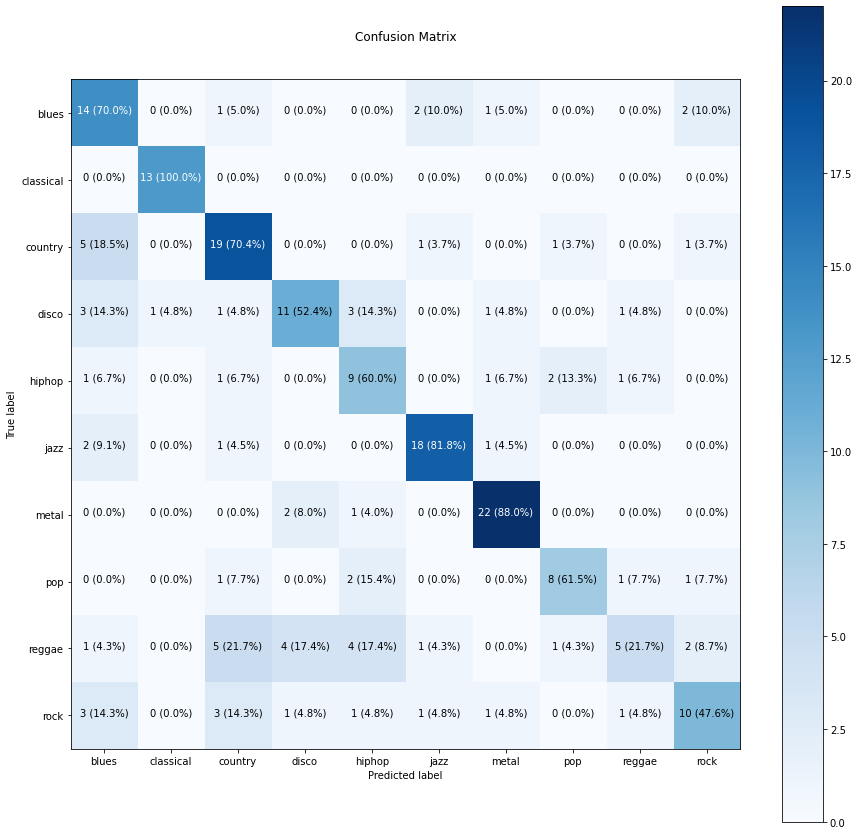

In [170]:
# Create test labels
class_names = ("blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock")

# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_test.values.argmax(axis=1), 
                      y_pred=y_preds.argmax(axis=1),
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)